# Liner Regresion


In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv(r"C:\Users\Nare\Downloads\boston_house_prices.csv", skiprows=1)

In [21]:
target = 'MEDV'

In [22]:
X = df.drop(columns=["MEDV"])
y = df["MEDV"]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [25]:
y_pred = model.predict(X_test)

In [26]:
mse = mean_squared_error(y_test, y_pred)
mse

24.291119474973538

In [27]:
r2 = r2_score(y_test, y_pred)
r2

0.6687594935356317

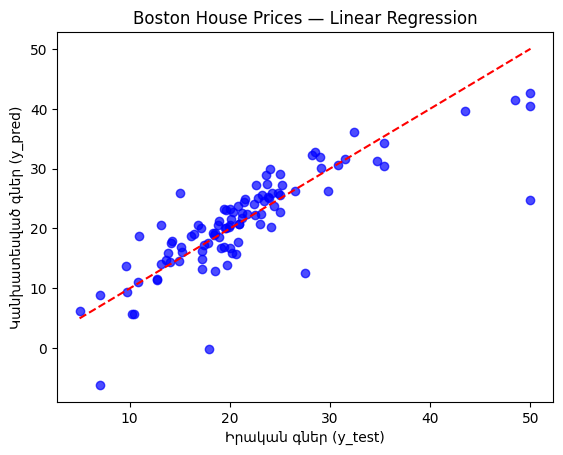

In [28]:
plt.scatter(y_test, y_pred, color="blue", alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Իրական գներ (y_test)")
plt.ylabel("Կանխատեսված գներ (y_pred)")
plt.title("Boston House Prices — Linear Regression")
plt.show()

# Polynomial Regression

In [48]:
X = df[["RM"]].values
y = df["MEDV"].values

In [49]:
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X)

In [50]:
model = LinearRegression()
model.fit(X_poly, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [51]:
y_pred = model.predict(X_poly)

In [52]:
xxx = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
xxx_poly = poly.transform(xxx)
yyy = model.predict(xxx_poly)

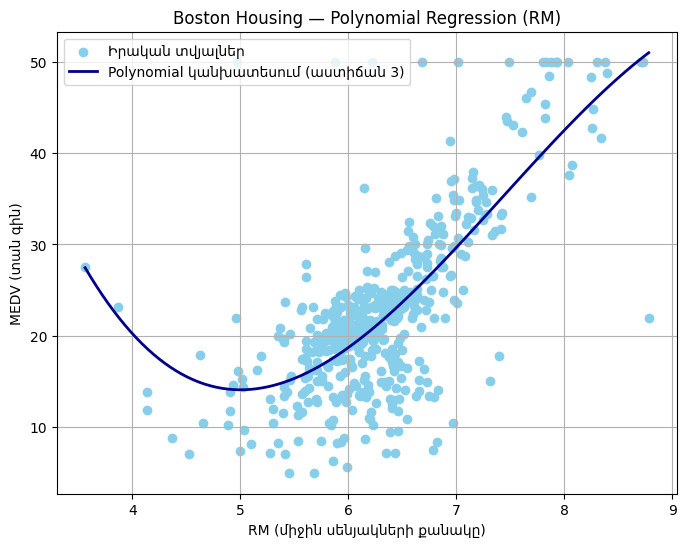

In [53]:
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color="skyblue", label="Իրական տվյալներ")
plt.plot(xxx, yyy, color="darkblue", linewidth=2, label="Polynomial կանխատեսում (աստիճան 3)")
plt.xlabel("RM (միջին սենյակների քանակը)")
plt.ylabel("MEDV (տան գին)")
plt.title("Boston Housing — Polynomial Regression (RM)")
plt.legend()
plt.grid(True)
plt.show()